In [1]:
from matplotlib import pyplot as plt
import cv2

In [65]:
import os
import random

In [9]:
obj_ims = []
for filename in os.listdir('object'):
    img = cv2.imread('object/' + filename)
    obj_ims.append(img)

In [63]:
cones=[]
for img in obj_ims:
    #img = img[:,:,::-1]
    imgorig=img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    th, mask_inv = cv2.threshold(img, 253, 255, cv2.THRESH_BINARY)
    #mask = cv2.bitwise_not(mask_inv)
    cones.append([imgorig,mask_inv])
    #plt.figure()
    #plt.imshow(img)
    #plt.show()

In [41]:
?cv2.resize

In [60]:

def drawimgatloc(img1,img2,mask_inv,x,y,height):
    rows,cols,channels = img2.shape
    scale=height/rows
    img1=img1.copy()
    img2=cv2.resize(img2,(0,0), fx=scale, fy=scale) 
    mask_inv=cv2.resize(mask_inv,(0,0), fx=scale,fy=scale)
    mask = cv2.bitwise_not(mask_inv)
    rows,cols,channels = img2.shape
    roi=img1[y:y+rows,x:x+cols]
    # Now black-out the area of logo in ROI
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
    # Take only region of logo from logo image.
    img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
    # Put logo in ROI and modify the main image
    dst = cv2.add(img1_bg,img2_fg)
    img1[y:y+rows, x:x+cols ] = dst
    return img1

In [52]:
def displayimg(img1):
    plt.figure()
    plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
    plt.show()

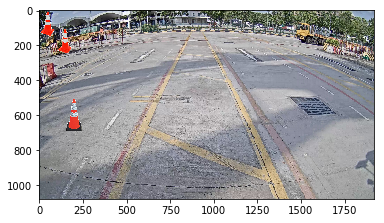

In [64]:
displayimg(drawimgatloc(imgdest,cones[1][0],mask_inv=cones[1][1],x=100,y=500,height=200))

In [44]:
roi.shape

(160, 100, 3)

In [45]:
mask.shape

(1600, 998)

In [66]:
180/7

25.714285714285715

In [67]:
import numpy as np

In [72]:
random.randint(10,100)

79

In [87]:
np.int8(np.floor([2551.1]))

array([-9], dtype=int8)

In [ ]:
random.uniform(0)

In [146]:
def fx(x):
    return 256/(1+np.exp(-x))
def fxinv(x):
    return -np.log(256/x-1)
def frand(x,k):
    return np.uint8(np.floor(fx(fxinv(x)*random.uniform(-2,2)+random.random()*k)))
def frand(x):
    return np.clip(x+random.randint(-100,100),0,255)

In [91]:
np.array([1])

array([1])

In [102]:
f

-120.0

In [148]:
list(frand(50) for x in range(100))

[119,
 137,
 88,
 55,
 39,
 94,
 14,
 0,
 58,
 70,
 106,
 74,
 0,
 84,
 30,
 130,
 5,
 110,
 122,
 78,
 75,
 0,
 109,
 30,
 66,
 0,
 114,
 106,
 0,
 0,
 77,
 122,
 130,
 34,
 86,
 0,
 141,
 125,
 11,
 0,
 85,
 143,
 0,
 53,
 60,
 18,
 0,
 100,
 0,
 147,
 0,
 124,
 87,
 122,
 0,
 113,
 129,
 142,
 56,
 149,
 41,
 0,
 0,
 0,
 0,
 100,
 0,
 0,
 36,
 67,
 0,
 87,
 77,
 79,
 0,
 0,
 9,
 88,
 132,
 0,
 0,
 115,
 61,
 63,
 103,
 142,
 98,
 0,
 0,
 9,
 55,
 8,
 0,
 0,
 127,
 95,
 125,
 78,
 118,
 128]

In [122]:

np.uint8(np.floor(fx(fxinv(250)+0.1)))

250

In [116]:
frand(np.array([250]),0.1)

array([-6], dtype=int8)

In [185]:
def colornoise(img):
    hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsvimg[:,:,0] = (hsvimg[:,:,0]+180+random.randint(-15,15))%180
    #hsvimg[:,:,1] = frand(hsvimg[:,:,1])
    #hsvimg[:,:,2] = frand(hsvimg[:,:,2])
    return cv2.cvtColor(hsvimg,cv2.COLOR_HSV2BGR)

In [ ]:
colo

In [29]:
bg_ims = []
for filename in os.listdir('bg'):
    img = cv2.imread('bg/' + filename)
    bg_ims.append(img)

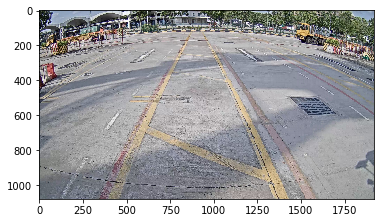

In [12]:
for img in bg_ims:
    img = img[:,:,::-1]
    plt.figure()
    plt.imshow(img)
    plt.show()

In [15]:
for img in obj_ims:
    print(img.shape)

(1600, 998, 3)
(1000, 1000, 3)
(1000, 1000, 3)
(466, 466, 3)
(1024, 753, 3)
(400, 400, 3)


In [16]:
for img in bg_ims:
    print(img.shape)

(1080, 1920, 3)


In [18]:
near_max_h = 150
far_max_h = 15

In [ ]:
displayimg(drawimgatloc(imgdest,cones[1][0],mask_inv=cones[1][1],x=100,y=500,height=200))

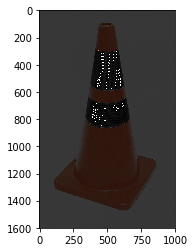

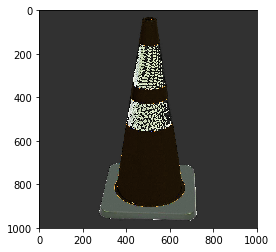

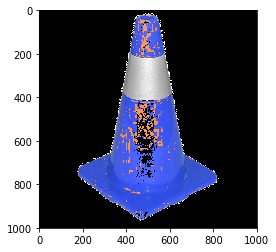

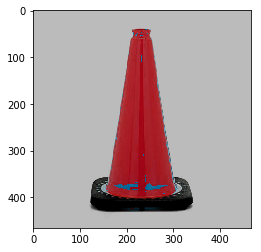

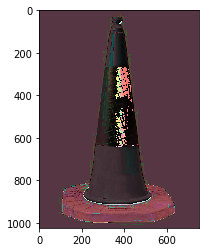

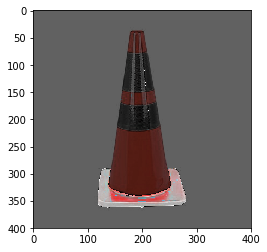

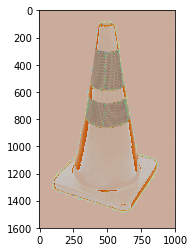

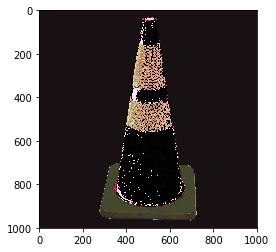

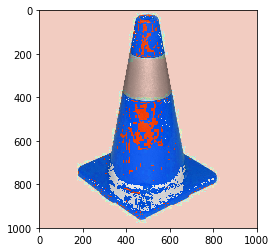

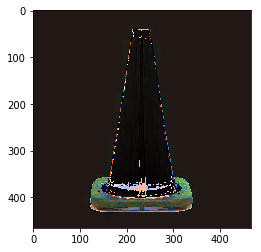

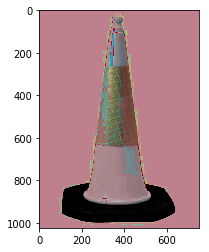

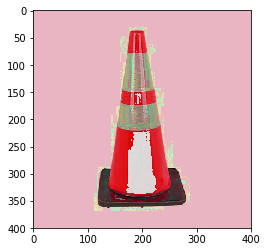

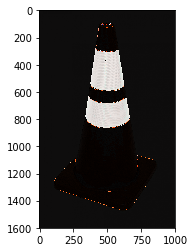

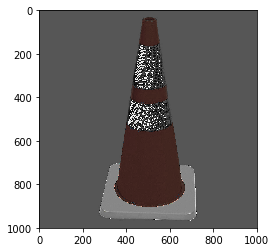

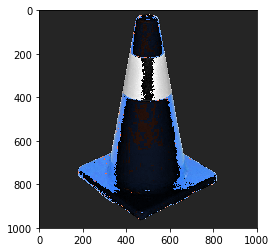

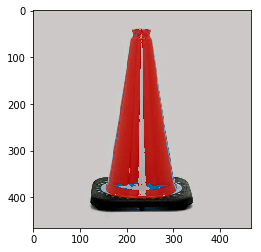

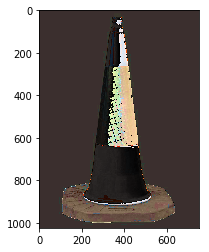

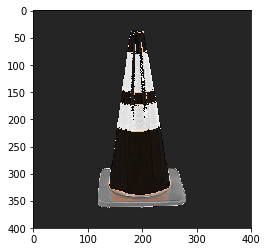

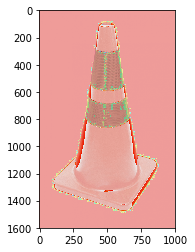

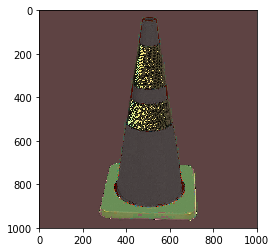

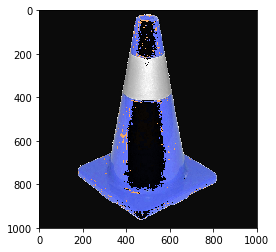

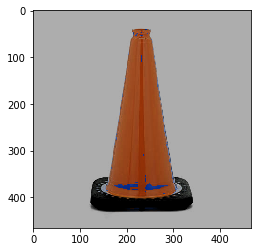

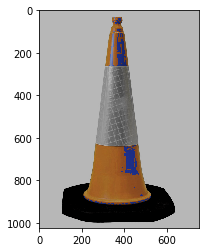

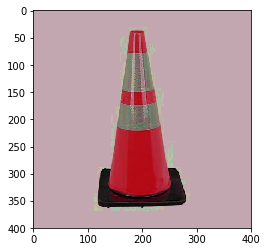

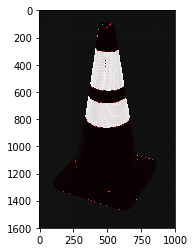

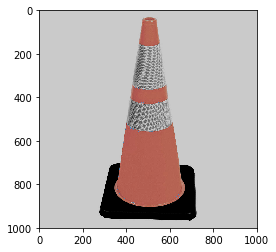

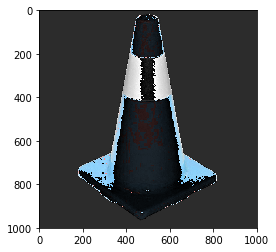

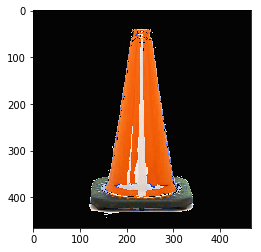

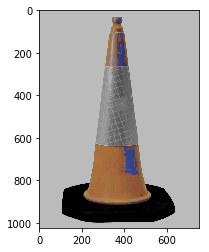

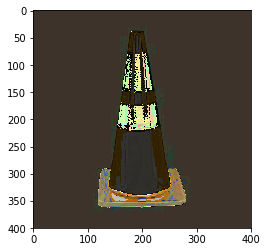

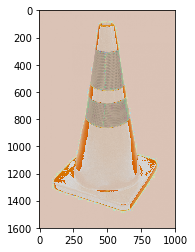

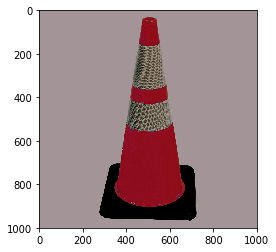

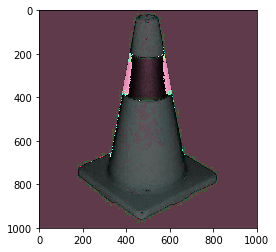

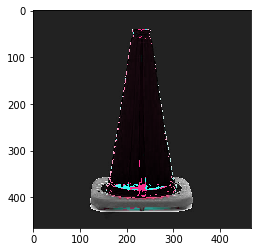

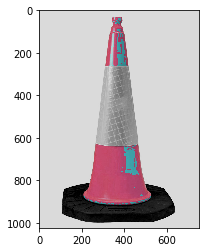

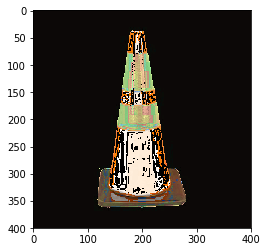

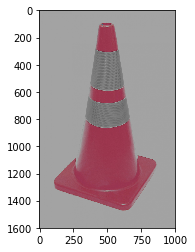

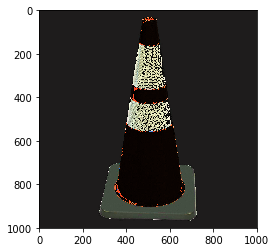

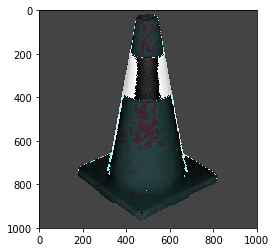

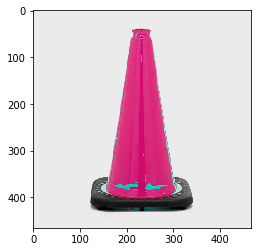

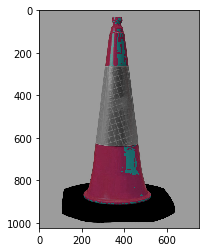

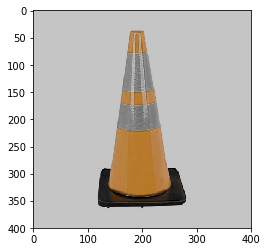

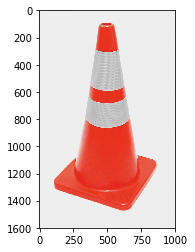

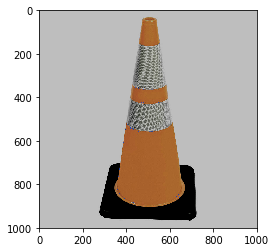

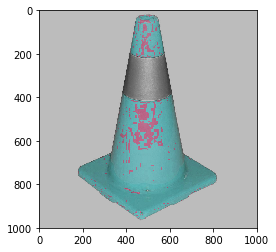

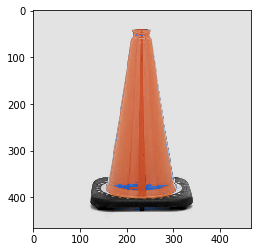

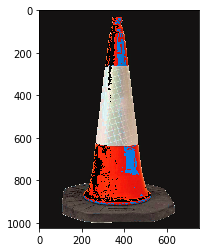

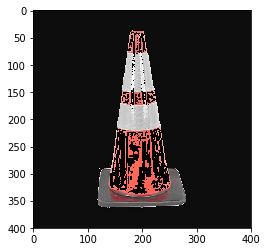

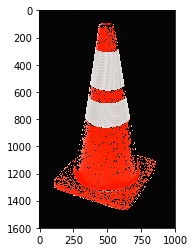

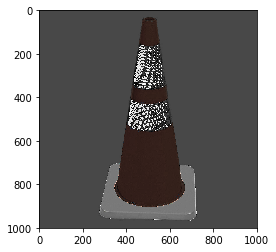

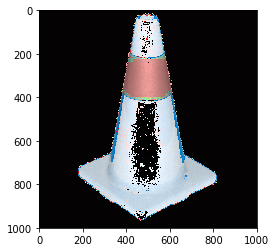

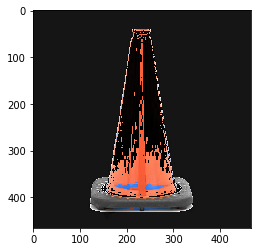

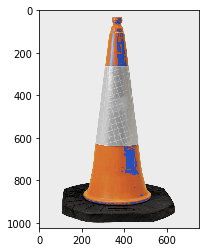

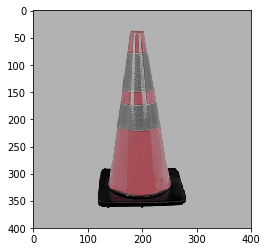

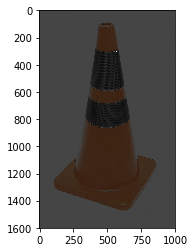

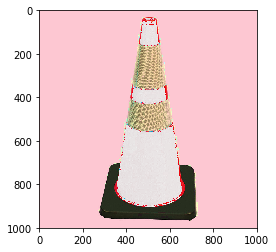

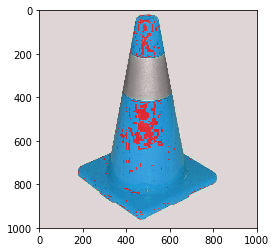

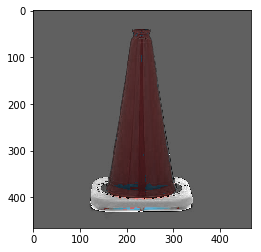

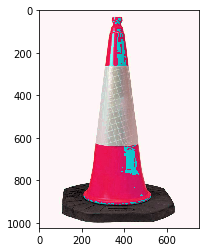

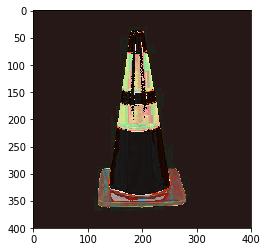

In [187]:
for i in range(10):
    for cone in cones:
        displayimg(colornoise(cone[0]))

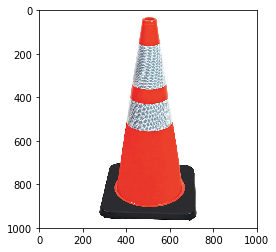

In [176]:
displayimg(cones[1][0])